# Outlier Detection with IQR (Interquartile Range)

## Objective
The **Interquartile Range (IQR)** is a measure of statistical dispersion, representing the difference between the 75th and 25th percentiles. This method is widely used for detecting outliers as part of data preprocessing. The goal of this lab is to apply the IQR algorithm for outlier detection.

## Prerequisites
Before proceeding, ensure you have completed all the content in submodule 3.2, specifically the lecture slides on the IQR algorithm. Familiarity with these concepts is crucial for understanding and implementing the outlier detection technique described here.

## IQR Algorithm for Outlier Detection
Follow these steps to detect outliers using the IQR method:
1. Arrange the data in ascending order.
2. Calculate the first quartile (Q1).
3. Calculate the third quartile (Q3).
4. Compute the IQR as $\(IQR = Q3 - Q1\)$.
5. Determine the lower bound $\(T_{\text{lower}} = Q1 - (1.5 \times IQR)\)$.
6. Determine the upper bound $\(T_{\text{upper}} = Q3 + (1.5 \times IQR)\)$.
7. Identify outliers. Data points outside the range $\([T_{\text{lower}}, T_{\text{upper}}]\)$ are considered outliers and should be filtered out.

## Instructions
- Implement the IQR algorithm using Python.
- Apply the algorithm to detect and remove outliers from the "LotArea" attribute in the training dataset of the House Price Prediction. This data can be found in `train.csv' and can be downloaded [here](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview).
- Compare the original and preprocessed datasets by plotting their distributions. Use box plots for this comparison, following the examples provided in the [matplotlib boxplot demo](https://matplotlib.org/3.1.1/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py).

This exercise will help you understand how to identify and remove outliers, improving the quality of your data for predictive modeling.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### 1. Laod data form csv using pandas

In [3]:
data = pd.read_csv('train.csv')

### Use describe to get overall statistics 

In [4]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### 2. Use descirbe the determine the values Q1, Q2, and Q3 for LotArea

In [7]:
data['LotArea'].describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

### 3. Compute Q1, Q3 and IQR using the .quantile funciton 

In [8]:
Q1 = data['LotArea'].quantile(0.25)
Q3 = data['LotArea'].quantile(0.75)
IQR = Q3-Q1
Q1,Q3,IQR

(7553.5, 11601.5, 4048.0)

### 4. Determine the upper and lower bounds. Any value outside of this will be outliners

In [9]:
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
lower, upper

(1481.5, 17673.5)

### 5. Find outliers
Filter using upper and lower

In [11]:
(data['LotArea'] < lower) |  (data['LotArea'] >upper)

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Name: LotArea, Length: 1460, dtype: bool

In [12]:
data[(data['LotArea'] < lower)  | (data['LotArea'] >upper)]['LotArea']

53      50271
66      19900
113     21000
120     21453
159     19378
        ...  
1396    57200
1409    20544
1423    19690
1430    21930
1446    26142
Name: LotArea, Length: 69, dtype: int64

### 6. Remove the outliers. Drop rows that are not in the [lower, upper]

In [14]:
data_no_outliers = data[(data['LotArea'] >= lower)  & (data['LotArea'] <= upper)]
data_no_outliers['LotArea'].describe()

count     1391.000000
mean      9272.537024
std       3196.732418
min       1491.000000
25%       7429.000000
50%       9286.000000
75%      11231.500000
max      17671.000000
Name: LotArea, dtype: float64

### 7. Compare the box plots

Box plot with orginal data

{'whiskers': [<matplotlib.lines.Line2D at 0x16319c97370>,
 'caps': [<matplotlib.lines.Line2D at 0x16319c97a30>,
 'boxes': [<matplotlib.lines.Line2D at 0x16319c82fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x16319ca6130>],
 'fliers': [<matplotlib.lines.Line2D at 0x16319ca6490>],
 'means': []}

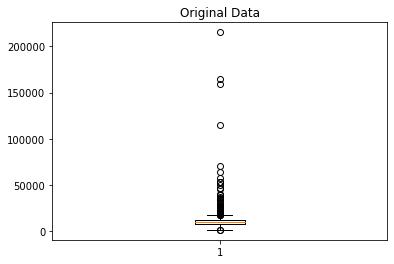

In [16]:
fig1, ax1 = plt.subplots()
ax1.set_title('Original Data')
ax1.boxplot(data['LotArea'])

Box plot with outliers removed

{'whiskers': [<matplotlib.lines.Line2D at 0x16319d6abb0>,
 'caps': [<matplotlib.lines.Line2D at 0x16319d772b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x16319d6a850>],
 'medians': [<matplotlib.lines.Line2D at 0x16319d77970>],
 'fliers': [<matplotlib.lines.Line2D at 0x16319d77cd0>],
 'means': []}

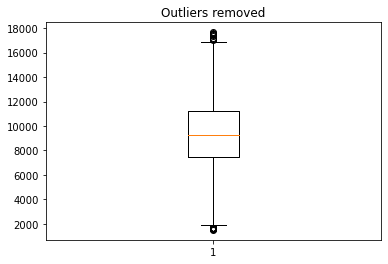

In [17]:
fig1, ax1 = plt.subplots()
ax1.set_title('Outliers removed')
ax1.boxplot(data_no_outliers['LotArea'])

Comment on the differnces between both box plots